In [1]:
import TurbPy as tb
from TurbPy.imports import *

In [2]:
# deck = 'KH_Lv1di/'
# deck = 'KH_new/'
# deck = 'KH_400ppc_200wci2/'
deck = 'KH_200ppc_200wci/'
# deck = 'KH_beta0.1/'
# deck = 'turb2/'

dirs = '/pscratch/sd/g/goodwill/' + deck

figs = '/pscratch/sd/g/goodwill/Fig/' + deck

info = tb.get_vpic_info(dirs)
times = tb.get_times(dirs)
en_out = tb.read_energies(dirs)

twci_out = np.linspace(0, times[-1] * info['dt*wci'], len(en_out['EM']))
twci = np.linspace(0, times[-1] * info['dt*wci'], len(times))

lx_de = info['Lx/de']
ly_de = info['Ly/de']

lx_di = info['Lx/di']
ly_di = info['Ly/di']

nx = int(info['nx'])
ny = int(info['ny'])

lxr_di = np.linspace(0, lx_di, nx)
lyr_di = np.linspace(0, ly_di, ny)

lxr_de = np.linspace(0, lx_de, nx)
lyr_de = np.linspace(0, ly_de, ny)

In [26]:
t = 560000
tin = int(t/info['fields_interval'])
print(twci[tin])

ds = tb.load_hydro_fil(dirs, t)
JiE, JeE, JE = tb.JE_calc(dirs, t)
pth, pid = tb.ps_calc(dirs, t, 'electron')
ps = pid + pth
pid_rms = np.sqrt(np.mean(pid**2))
ps_rms = np.sqrt(np.mean((pid + pth)**2))
JeE_rms = np.sqrt(np.mean(JeE**2))
JE_rms = np.sqrt(np.mean(JE**2))

pid_rms = np.std(pid)
ps_rms =np.std(pid + pth)
pth_rms = np.std(pth)
JeE_rms = np.std(JeE)
JE_rms =  (np.std(JE))

np.corrcoef((JE/JE_rms).flatten(), (pth/pth_rms).flatten())

154.67961600000004


array([[1.        , 0.00123337],
       [0.00123337, 1.        ]])

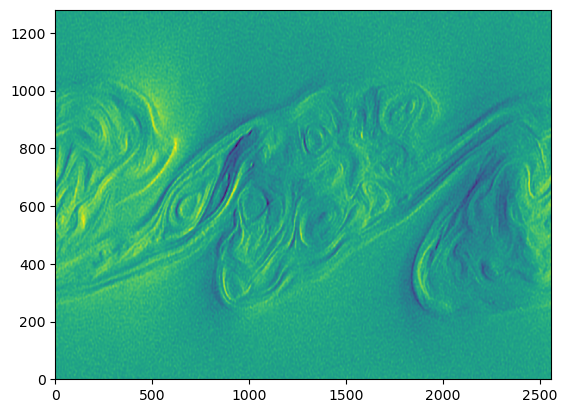

In [4]:
plt.pcolormesh(ds['jx'])

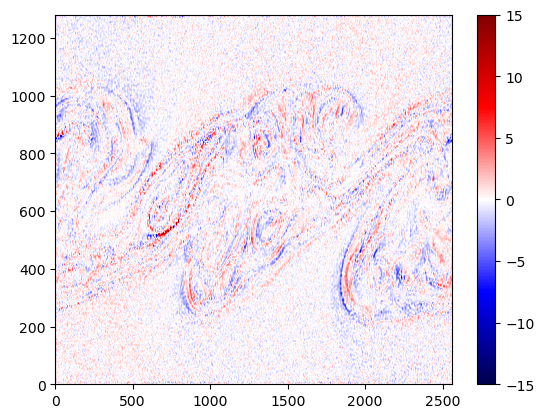

In [5]:
plt.pcolormesh(JE/JE_rms, cmap = 'seismic', vmin = -15, vmax = 15)
plt.colorbar()

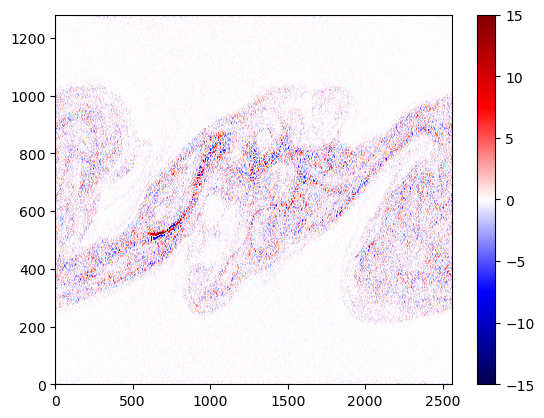

In [6]:
plt.pcolormesh(pid/pid_rms, cmap = 'seismic', vmin = -15, vmax = 15)
plt.colorbar()

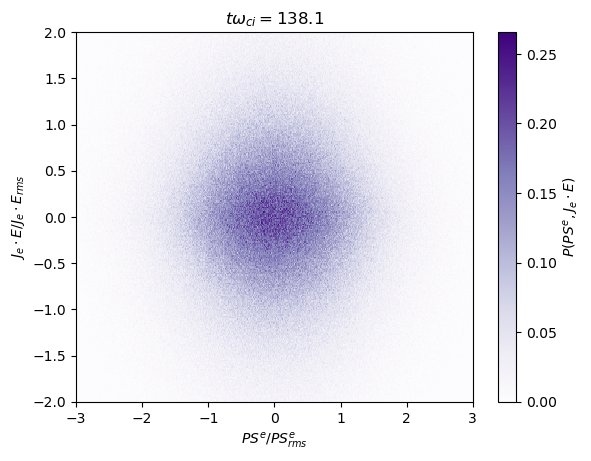

In [7]:
plt.hist2d((ps/ps_rms).flatten(), (JeE/JeE_rms).flatten(),cmap = 'Purples', bins = 1500, density = True)
# plt.ylim(-5 *10**(-5), 5 *10**(-5))
# plt.xlim(-5 *10**(-6), 5 *10**(-6))
plt.ylim(-2, 2)
plt.xlim(-3, 3)
plt.title(r'$t \omega_{ci} =$'f'{np.round(twci[tin],1)}')
plt.colorbar(label = r'$P(PS^e, J_e \cdot E)$')
plt.xlabel(r'$PS^e/PS^e_{rms}$')
plt.ylabel(r'$J_e \cdot E/J_e\cdot E_{rms}$')
plt.savefig(figs + 'PS_JE_2Dhist.png')

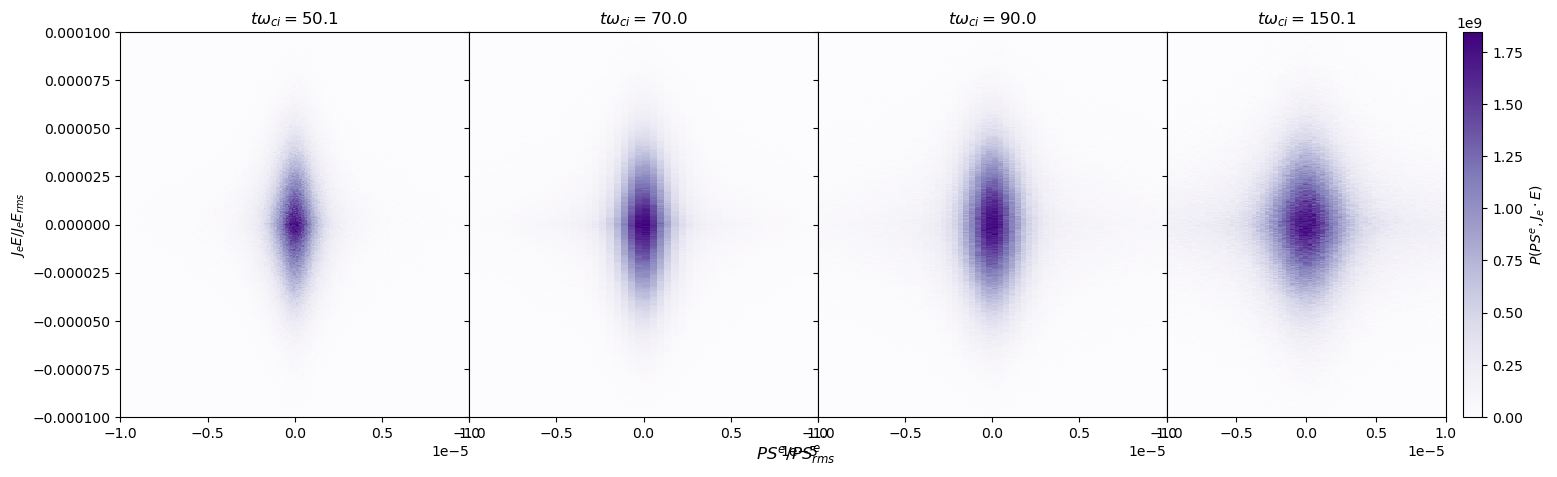

In [12]:
fig, axs = plt.subplots(1,4, figsize=(18,5), sharex = True, sharey = True)
fig.subplots_adjust(wspace = 0, hspace = 0)
snaps = [363, 507, 652, 1087]

for i in np.arange(0,len(snaps)):
  t = snaps[i]
  ds = tb.load_hydro_fil(dirs, times[t])
  JiE, JeE, JE = tb.JE_calc(dirs, times[t])
  pth, pid = tb.ps_calc(dirs, times[t], 'electron')
  ps = pid + pth
  pid_rms = np.sqrt(np.mean(pid**2))
  ps_rms = np.sqrt(np.mean((pid + pth)**2))
  JeE_rms = np.sqrt(np.mean(JeE**2))
  JE_rms = np.sqrt(np.mean(JE**2))

  axs[i].hist2d((pid).flatten(), (JeE).flatten(),cmap = 'Purples', bins = 1500, density = True)
  if i == 3:
    cm = axs[3].hist2d((pid).flatten(), (JeE).flatten(),cmap = 'Purples', bins = 1500, density = True)
    fig.colorbar(cm[3], ax = axs[3], label = r'$P(PS^e, J_e \cdot E)$')
  axs[i].set_ylim(-0.0001, 0.0001)
  axs[i].set_xlim(-0.00001, 0.00001)
  axs[i].set_title(r'$t \omega_{ci} =$'f'{np.round(twci[t],1)}')
  fig.supxlabel(r'$PS^e/PS^e_{rms}$')
  axs[0].set_ylabel(r'$J_e E/J_e E_{rms}$')
  fig.savefig(figs + 'PS_JE_e_2Dhist.png')

array([[1.        , 0.00731713],
       [0.00731713, 1.        ]])

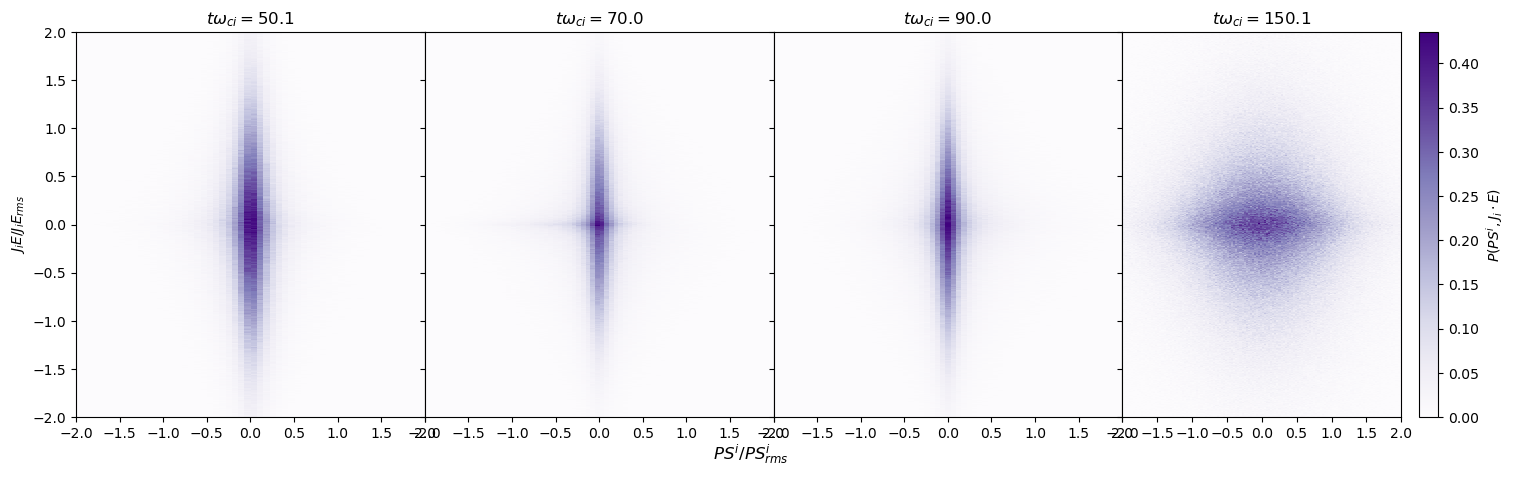

In [9]:
fig, axs = plt.subplots(1,4, figsize=(18,5), sharex = True, sharey = True)
fig.subplots_adjust(wspace = 0, hspace = 0)
snaps = [363, 507, 652, 1087]

for i in np.arange(0,len(snaps)):
  t = snaps[i]
  ds = tb.load_hydro_fil(dirs, times[t])
  JiE, JeE, JE = tb.JE_calc(dirs, times[t])
  pth, pid = tb.ps_calc(dirs, times[t], 'ion')
  ps = pid + pth
  pid_rms = np.sqrt(np.mean(pid**2))
  ps_rms = np.sqrt(np.mean((pid + pth)**2))
  JiE_rms = np.sqrt(np.mean(JeE**2))
  JeE_rms = np.sqrt(np.mean(JeE**2))
  JE_rms = np.sqrt(np.mean(JE**2))

  axs[i].hist2d((pid/pid_rms).flatten(), (JiE/JiE_rms).flatten(),cmap = 'Purples', bins = 1500, density = True)
  if i == 3:
    cm = axs[3].hist2d((ps/ps_rms).flatten(), (JiE/JiE_rms).flatten(),cmap = 'Purples', bins = 1500, density = True)
    fig.colorbar(cm[3], ax = axs[3], label = r'$P(PS^i, J_i \cdot E)$')
  axs[i].set_ylim(-2, 2)
  axs[i].set_xlim(-2, 2)
  axs[i].set_title(r'$t \omega_{ci} =$'f'{np.round(twci[t],1)}')
  fig.supxlabel(r'$PS^i/PS^i_{rms}$')
  axs[0].set_ylabel(r'$J_i E/J_i E_{rms}$')
  fig.savefig(figs + 'PS_JE_i_2Dhist.png')